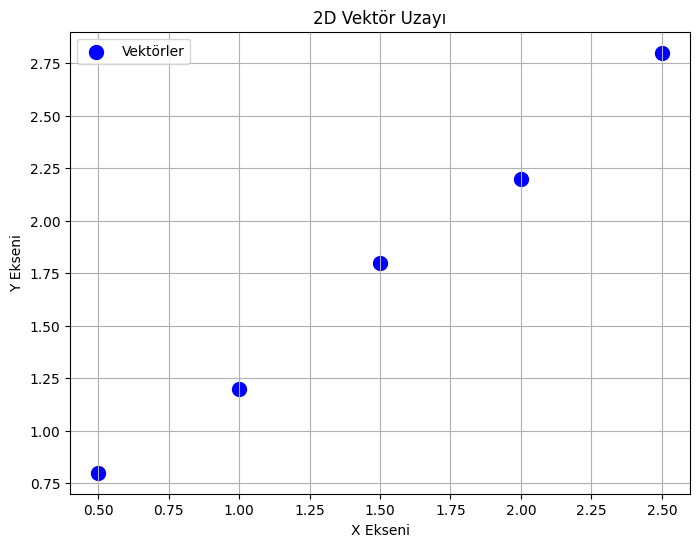

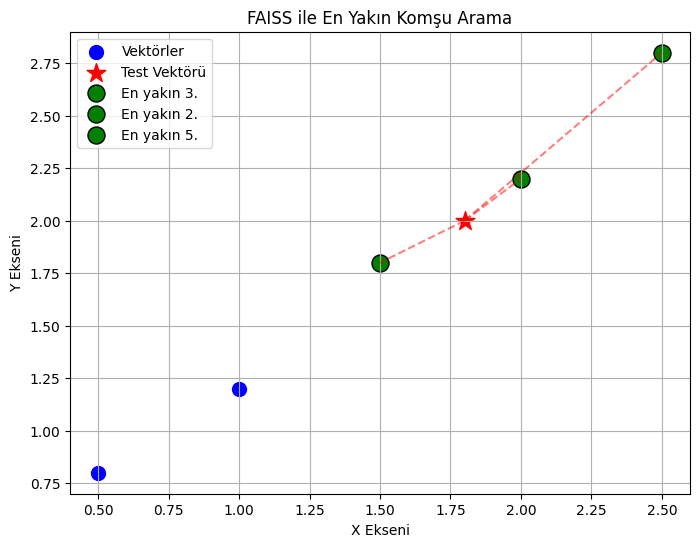

In [ ]:
import faiss
import numpy as np
import matplotlib.pyplot as plt

# Basit 2D vektörler oluşturma (görselleştirme kolay olsun)
vectors = np.array([
    [1.0, 1.2],
    [1.5, 1.8],
    [2.0, 2.2],
    [0.5, 0.8],
    [2.5, 2.8]
], dtype='float32')

# Görselleştirme
plt.figure(figsize=(8, 6))
plt.scatter(vectors[:,0], vectors[:,1], c='blue', s=100, label='Vektörler')
plt.xlabel('X Ekseni')
plt.ylabel('Y Ekseni')
plt.title('2D Vektör Uzayı')
plt.grid()
plt.legend()
plt.show()

# FAISS index oluşturma
index = faiss.IndexFlatL2(2)  # 2 boyutlu L2 mesafesi
index.add(vectors)

# Test vektörü
test_vector = np.array([[1.8, 2.0]], dtype='float32')

# Arama yapma
D, I = index.search(test_vector, 3)

# Sonuçları görselleştirme
plt.figure(figsize=(8, 6))
plt.scatter(vectors[:,0], vectors[:,1], c='blue', s=100, label='Vektörler')
plt.scatter(test_vector[:,0], test_vector[:,1], c='red', s=200, marker='*', label='Test Vektörü')

# En yakın komşuları işaretle
for i in I[0]:
    plt.plot([test_vector[0,0], vectors[i,0]],
             [test_vector[0,1], vectors[i,1]],
             'r--', alpha=0.5)
    plt.scatter(vectors[i,0], vectors[i,1], c='green', s=150, edgecolors='black', label=f'En yakın {i+1}.')

plt.xlabel('X Ekseni')
plt.ylabel('Y Ekseni')
plt.title('FAISS ile En Yakın Komşu Arama')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# L2 (Euclidean) ve Inner Product (iç çarpım) karşılaştırması
index_l2 = faiss.IndexFlatL2(64)
index_ip = faiss.IndexFlatIP(64)

index_l2.add(vectors)
index_ip.add(vectors)

# Aynı test vektörü için sonuçları karşılaştır
D_l2, I_l2 = index_l2.search(test_vector, 4)
D_ip, I_ip = index_ip.search(test_vector, 4)

print("L2 (Euclidean) Sonuçları:")
print("İndeksler:", I_l2)
print("Mesafeler:", D_l2)

print("\nInner Product Sonuçları:")
print("İndeksler:", I_ip)
print("Benzerlik Skorları:", D_ip)  # Büyük değer = daha benzer

L2 (Euclidean) Sonuçları:
İndeksler: [[502 606 234  85]]
Mesafeler: [[6.099058  6.650052  6.803897  6.9097624]]

Inner Product Sonuçları:
İndeksler: [[785 597 281 618]]
Benzerlik Skorları: [[18.539787 18.072426 17.817795 17.672642]]
